# Boston Housing Dataset


<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/boston.jpg" width=1000>

The Boston data frame has 506 rows and 14 columns.This dataframe contains the following columns:


CRIM  = per capita crime rate by town.

ZN = proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS = proportion of non-retail business acres per town.

CHAS = Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX = nitrogen oxides concentration (parts per 10 million).

RM = average number of rooms per dwelling.

AGE = proportion of owner-occupied units built prior to 1940.

DIS = weighted mean of distances to five Boston employment centres.

RAD = index of accessibility to radial highways.

TAX = full-value property-tax rate per $10,000.

PTRATIO = pupil-teacher ratio by town.

BLACK = 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

LSTAT = lower status of the population (percent).

price = median value of owner-occupied homes in $1000s

** Price is the TARGET variable **

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/boston_houses.csv

SyntaxError: invalid syntax (1409210680.py, line 1)

In [3]:
data = pd.read_csv("boston_houses.csv")
data

FileNotFoundError: [Errno 2] No such file or directory: 'boston_houses.csv'

In [5]:
## fix the rename with inplace
#data.rename(columns={'oldName1': 'newName1'}, inplace=True)
data.rename(columns={'MEDV': 'Price'}, inplace=True) #preview

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
data.describe().T

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
Price    506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677083   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.955000   37.9700  
Price     25.000000   50.0000

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

# Data Visualization

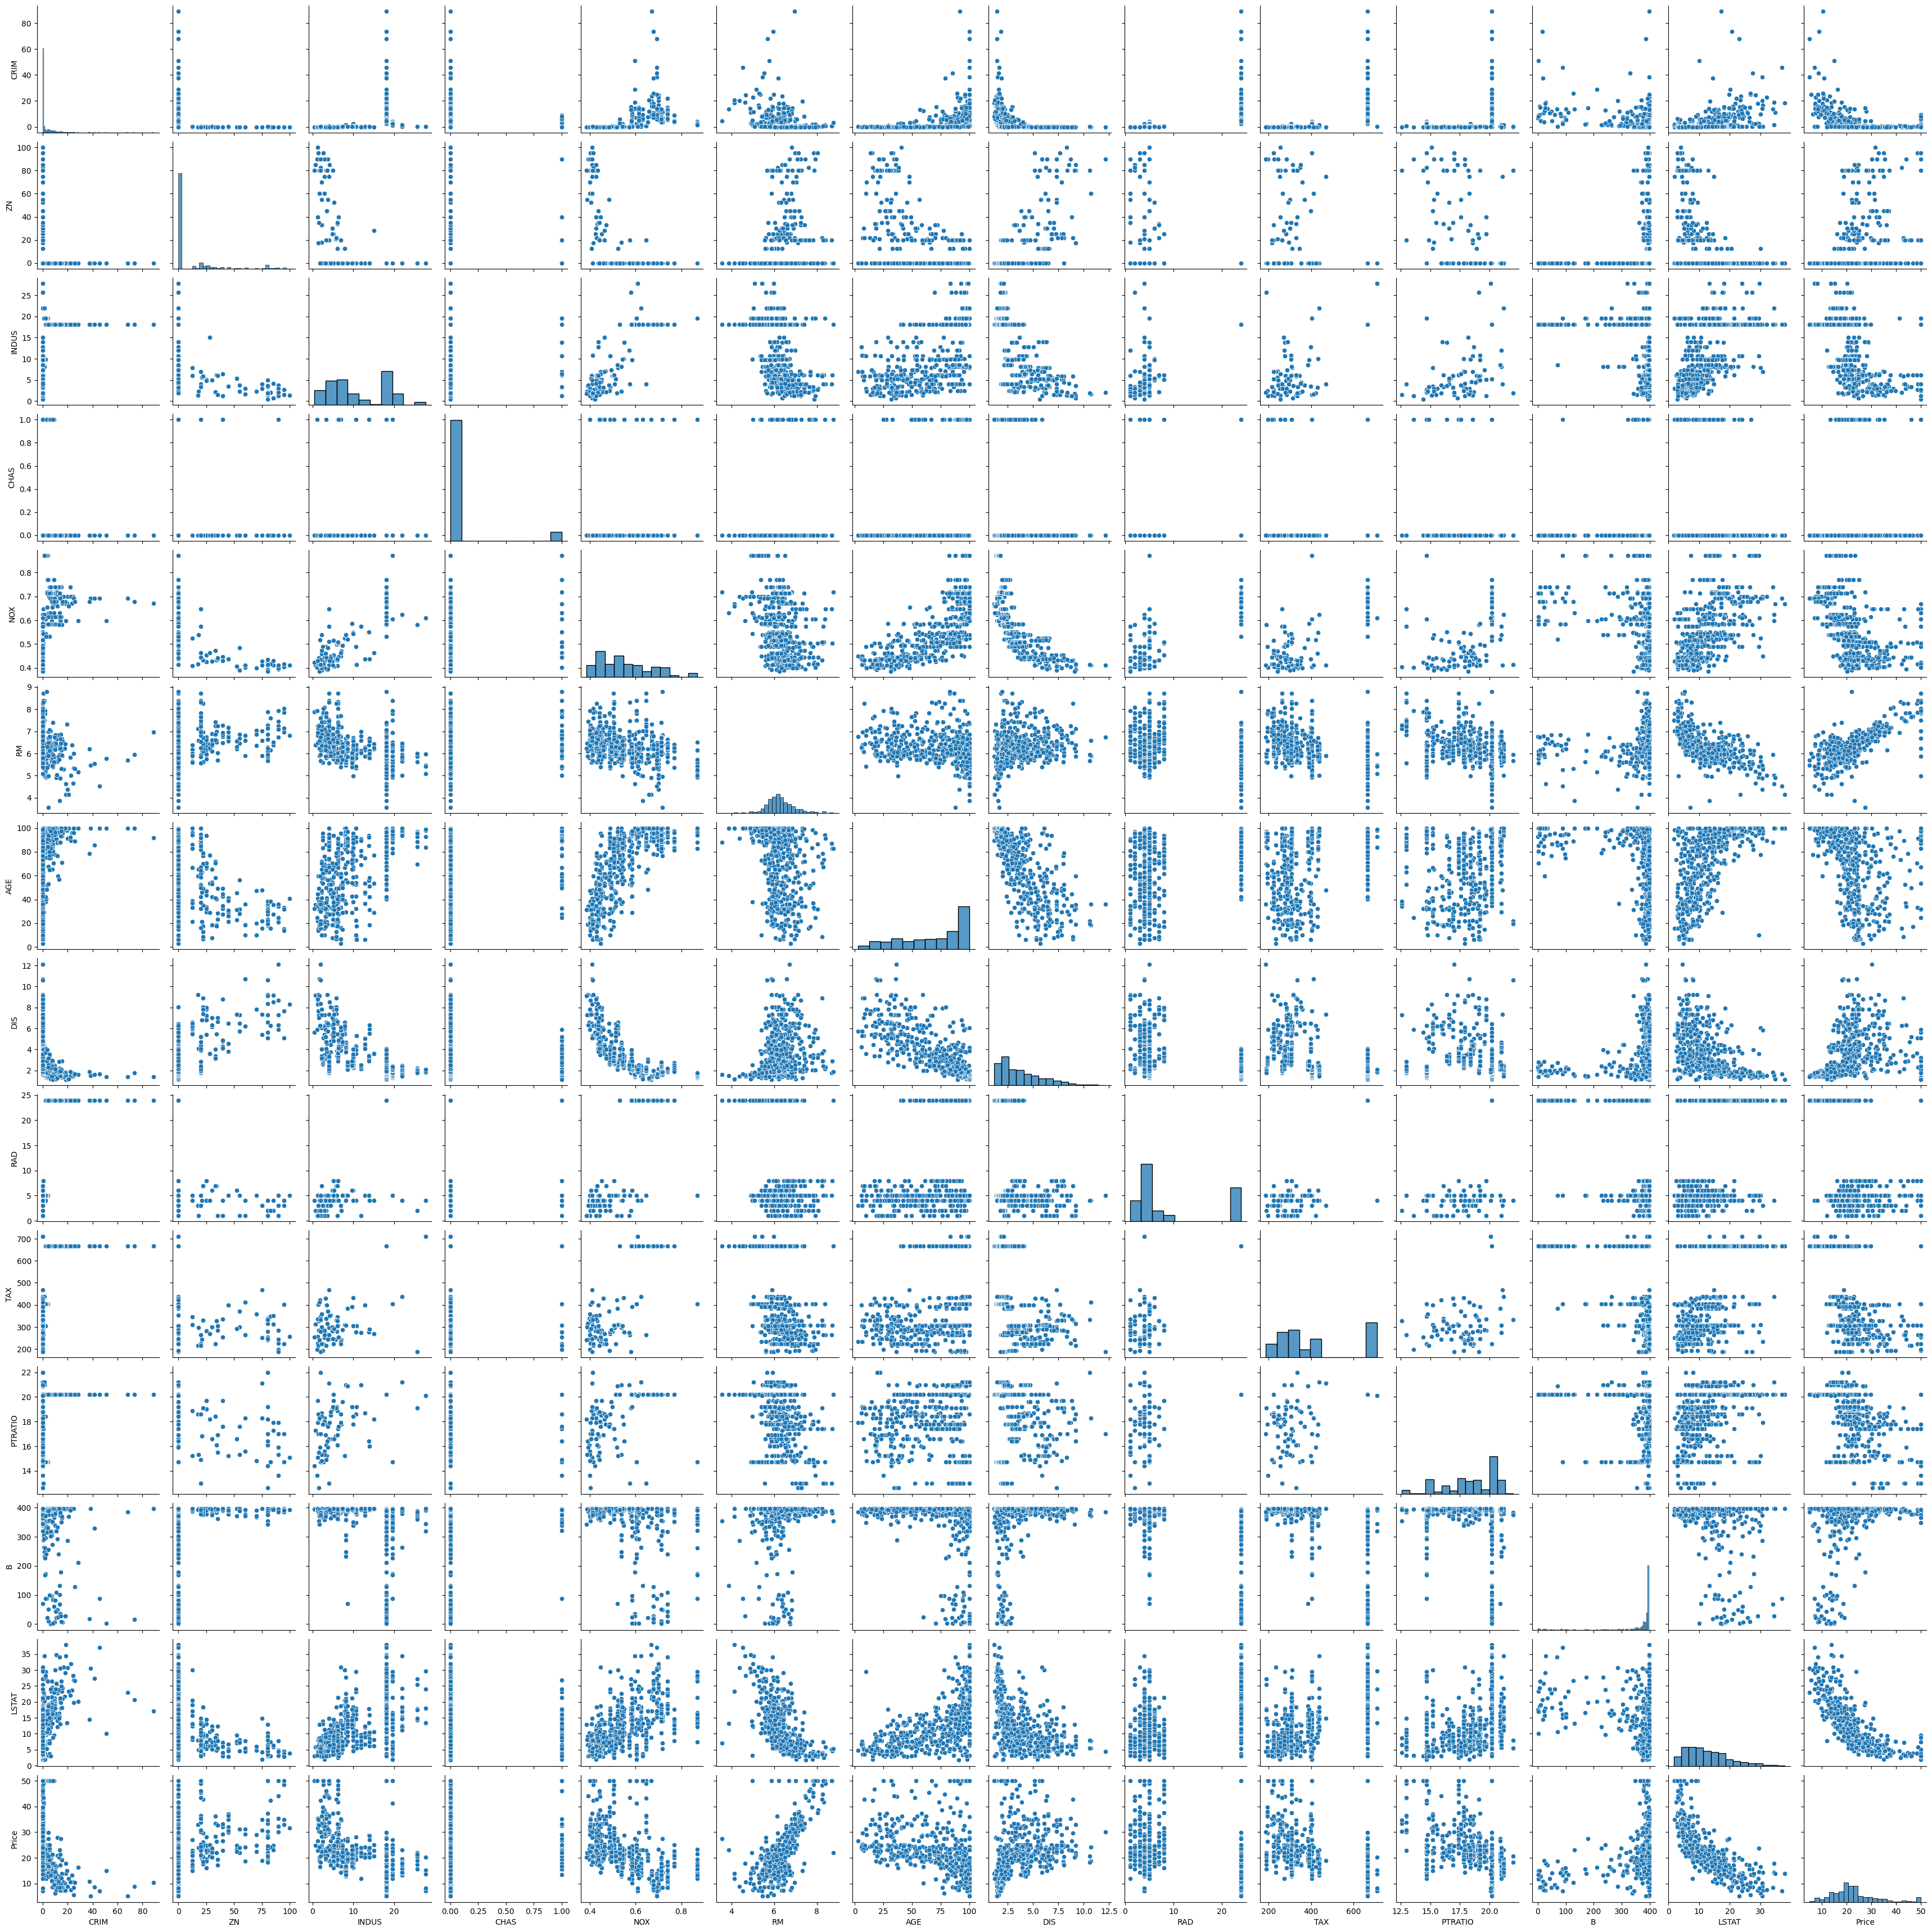

In [10]:
sns.pairplot(data)

CREARE VARIABILI CATEGORICHE PER VARIABILI CONTINUE E VISUALIZZARLE

In [11]:
df_cat=data.copy()

In [12]:
def get_age_category(x):
    if x < 50:
        return 'New'
    elif 50 <= x < 85:
        return 'Old'
    else:
        return 'Very_Old'

df_cat['AGE_category'] = df_cat.AGE.apply(get_age_category)

In [13]:
df_cat.groupby('AGE_category').size()

AGE_category
New         147
Old         149
Very_Old    210
dtype: int64

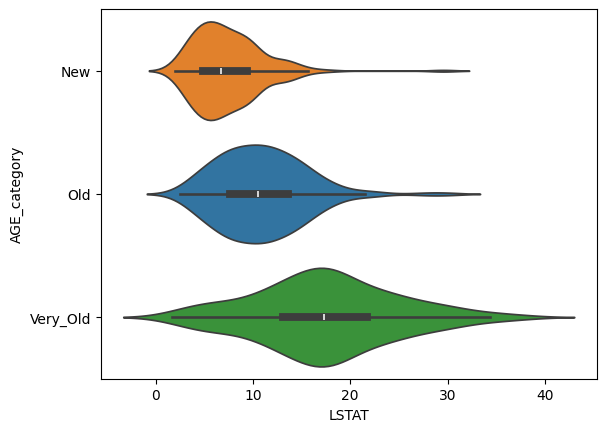

In [14]:
sns.violinplot(x='LSTAT', y='AGE_category', data=df_cat, order=['New', 'Old','Very_Old'],hue='AGE_category');

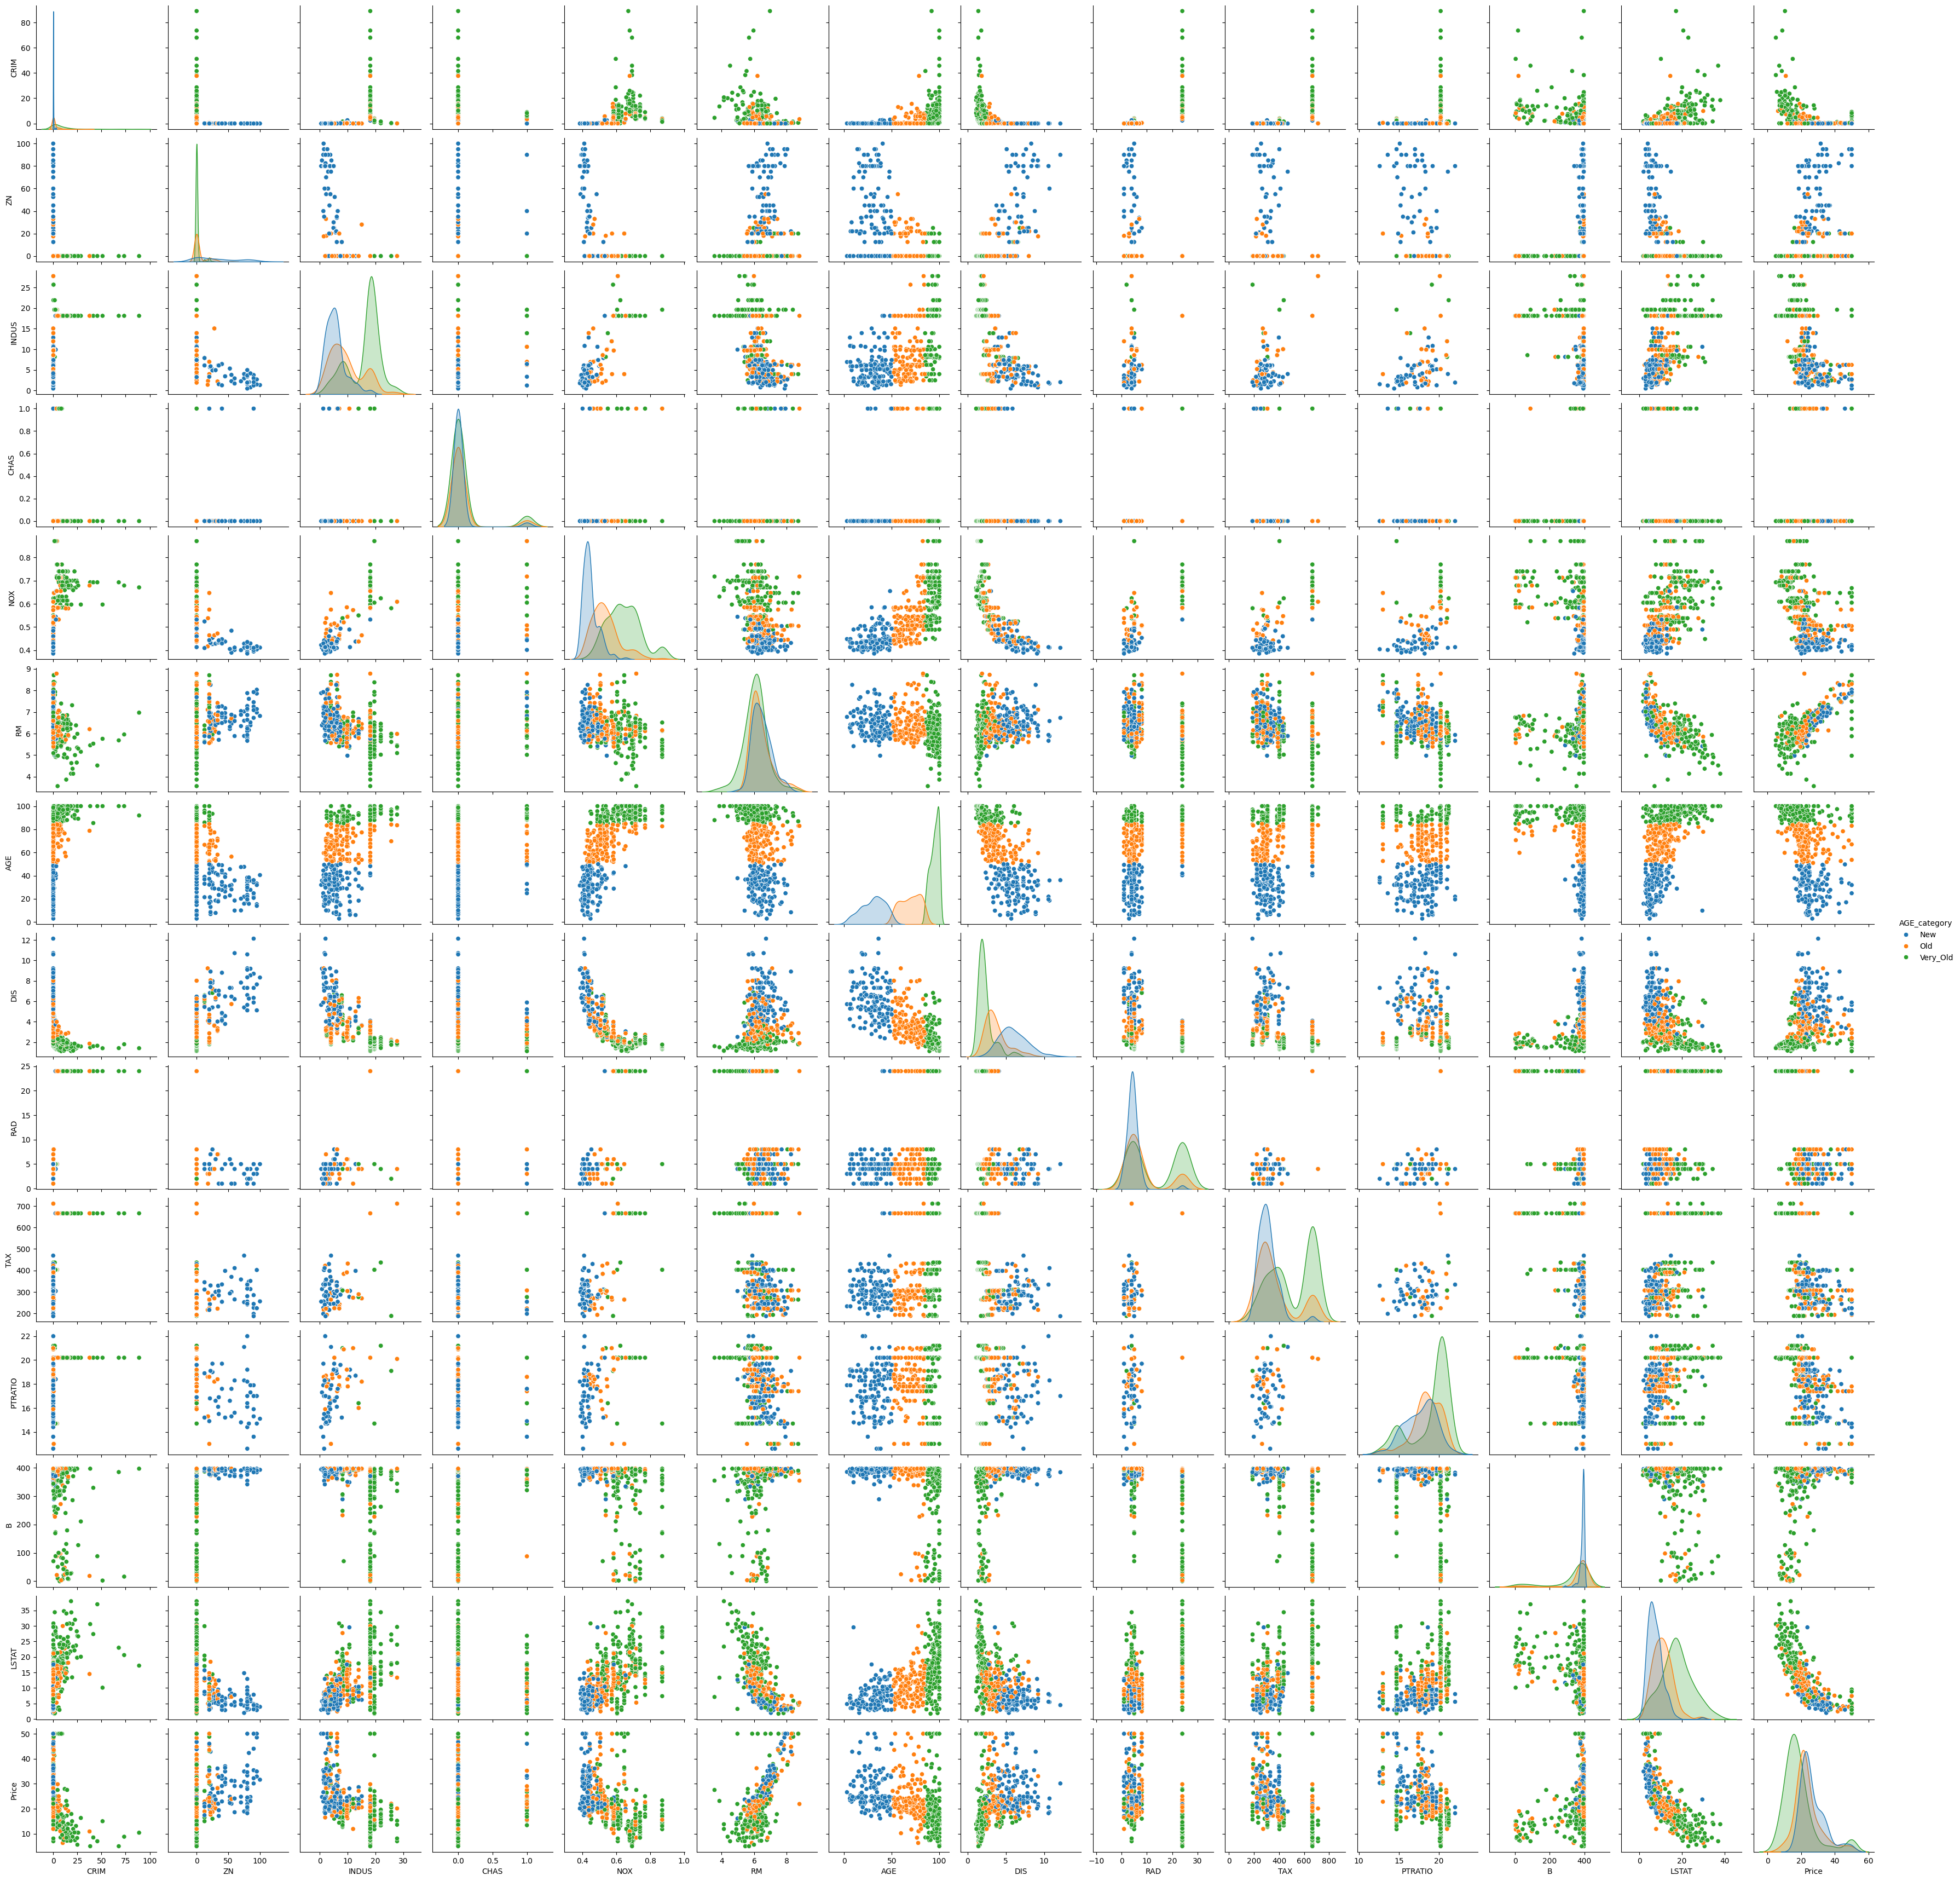

In [15]:
sns.pairplot(df_cat, hue='AGE_category',hue_order=['New', 'Old','Very_Old']);

In [16]:
############ fine esperimento

In [17]:
# define numeric and categorical columns
num_col = data.describe().columns.tolist()
all_col = data.columns.tolist()
obj_col = [i for i in all_col if i not in num_col]

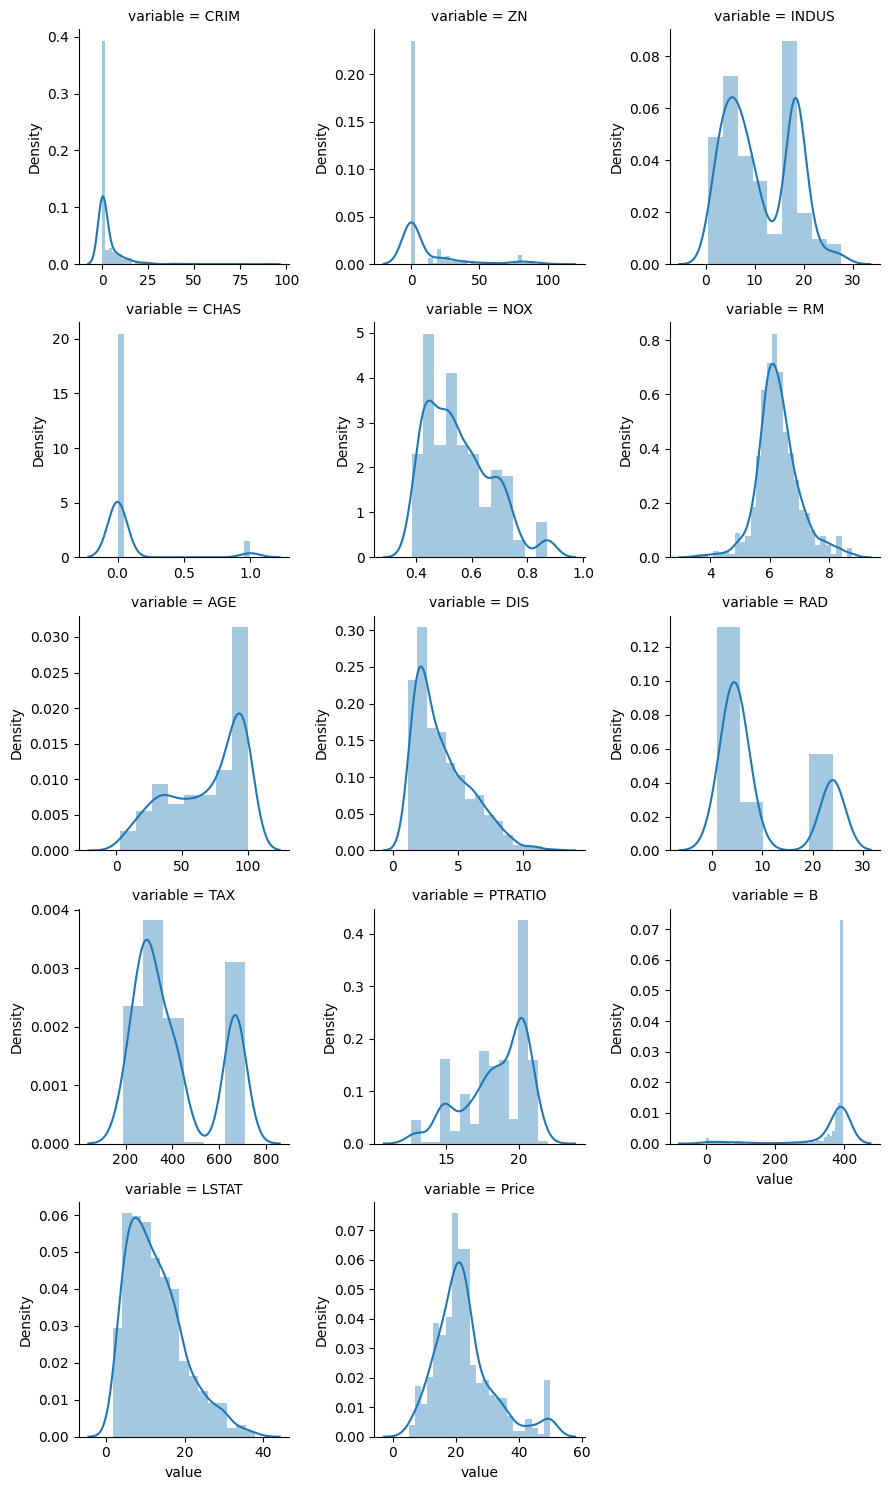

In [18]:
def viz(df,types):
    num = df
    f = pd.melt(num, value_vars=num)
    g = sns.FacetGrid(f, col="variable",  col_wrap=3,
                      sharex=False, sharey=False)
    g = g.map(types, "value")
    plt.show()
    return (g)
# histogram visualization
viz(data[num_col], sns.distplot)

In [19]:
# !pip install --upgrade klib

# import klib
# klib.dist_plot(data)

In [20]:
!pip install jupyter-summarytools -q

from summarytools import dfSummary
dfSummary(data)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.2 MB/s eta 0:00:00


## Regressione con tutte le Features

In [21]:
## STEP1 DEFINIZIONE DI INPUT E OUTPUT
target = 'Price'
X = data.drop(columns=[target])
y = data[target]

## STEP2 TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=667,
                                                   )

## STEP3 MODELLAZIONE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

## STEP4 PREDIZIONE
y_pred = model.predict(X_test)

## STEP5 VERIFICA METRICHE
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)

print(f'R2 score {r2}')
print(f'MSE score {mse}')
print(f'MAE score {mae}')
print(f'RMSE score {rmse}')

R2 score 0.6113097827490284
MSE score 34.485513964839186
MAE score 3.683772031811659
RMSE score 5.872436799561081


### Feature Selection with correlation

In [22]:
corrmat = data.corr()
corrmat

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
Price   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     Price  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
Price    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

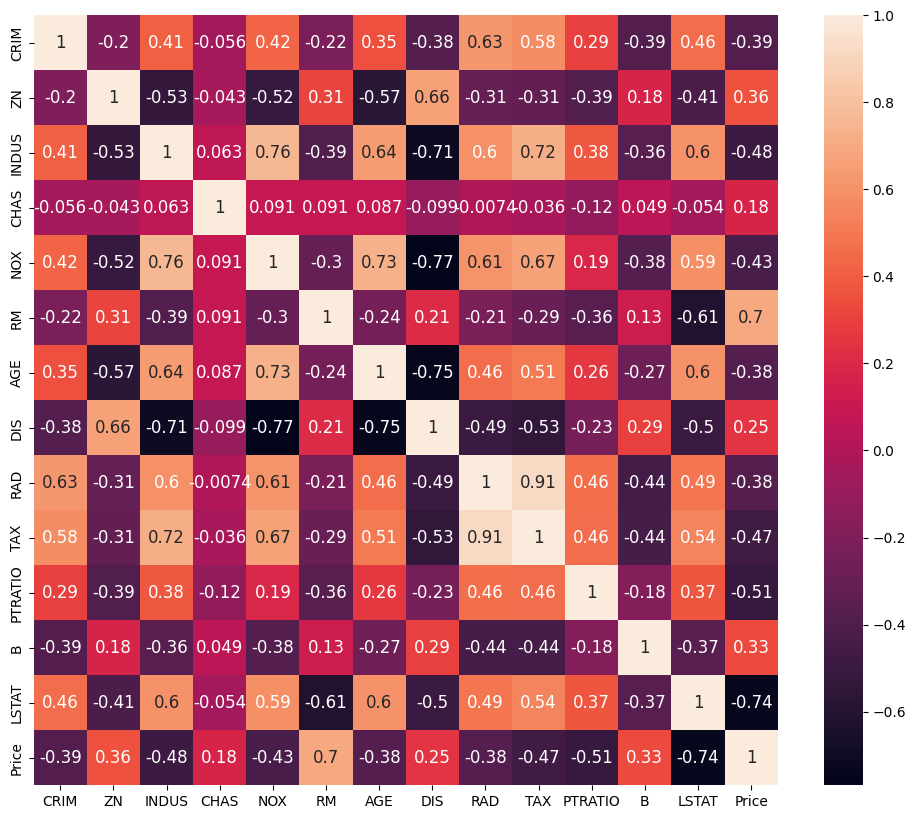

In [23]:
plt.figure(figsize = (12, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12});

## Regressione Advanced

In [42]:
df = data.copy()

In [52]:
X = df.drop('Price',axis=1)
#X = df[['LSTAT','PTRATIO','RM']]
y = df['Price']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 667
                                                    )

In [54]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


# Standardizzo le feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """ fitto il modello e lo valido con le metrice di regressione
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Misurazione errore
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    # Cross validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    print(f"\nRisultati per {model_name}:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.3f}")
    print(f"CV R2 Scores: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

    return y_pred, r2

In [55]:
# 1. Linear Regression
lr = LinearRegression()
y_pred_lr, r2_lr = evaluate_model(lr, X_train_scaled, X_test_scaled, y_train, y_test, "Linear Regression")


Risultati per Linear Regression:
RMSE: 5.47
R2 Score: 0.665
CV R2 Scores: 0.707 (+/- 0.185)


In [56]:
# 2. Lasso Regression
lasso = Lasso(alpha=0.1)
y_pred_lasso, r2_lasso = evaluate_model(lasso, X_train_scaled, X_test_scaled, y_train, y_test, "Lasso")


Risultati per Lasso:
RMSE: 5.49
R2 Score: 0.663
CV R2 Scores: 0.704 (+/- 0.200)


In [57]:
# 3. Ridge Regression
ridge = Ridge(alpha=0.1)
y_pred_ridge, r2_ridge = evaluate_model(ridge, X_train_scaled, X_test_scaled, y_train, y_test, "Ridge")


Risultati per Ridge:
RMSE: 5.47
R2 Score: 0.665
CV R2 Scores: 0.707 (+/- 0.185)


In [58]:
# 4. Elastic Net
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
y_pred_elastic, r2_elastic = evaluate_model(elastic, X_train_scaled, X_test_scaled, y_train, y_test, "Elastic Net")


Risultati per Elastic Net:
RMSE: 5.47
R2 Score: 0.665
CV R2 Scores: 0.706 (+/- 0.201)


([0, 1, 2, 3],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Lasso'),
  Text(2, 0, 'Ridge'),
  Text(3, 0, 'Elastic Net')])

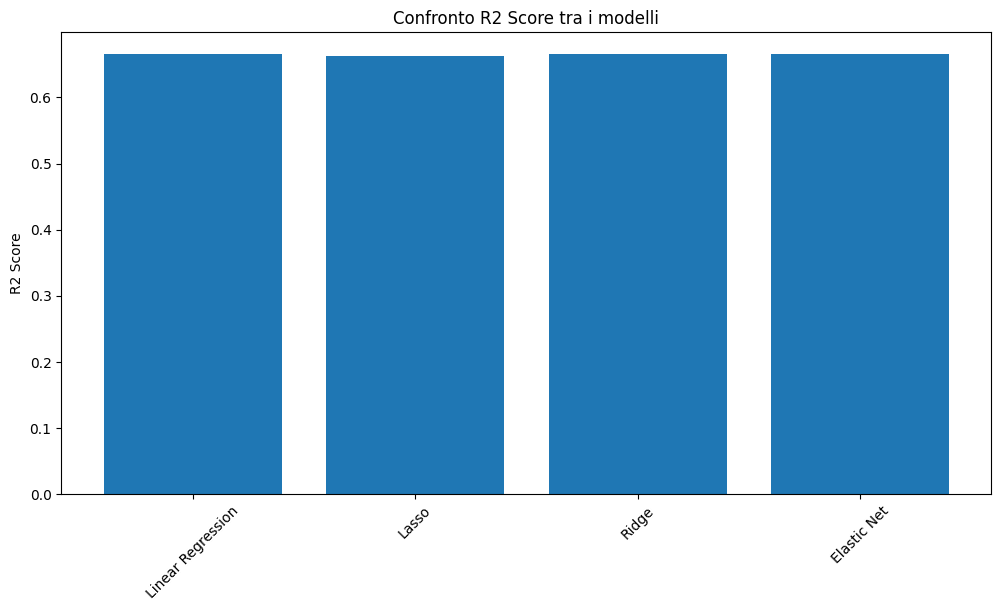

In [59]:
plt.figure(figsize=(12, 6))
models = ['Linear Regression', 'Lasso', 'Ridge', 'Elastic Net']
r2_scores = [r2_lr, r2_lasso, r2_ridge, r2_elastic]

plt.bar(models, r2_scores)
plt.title('Confronto R2 Score tra i modelli')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)

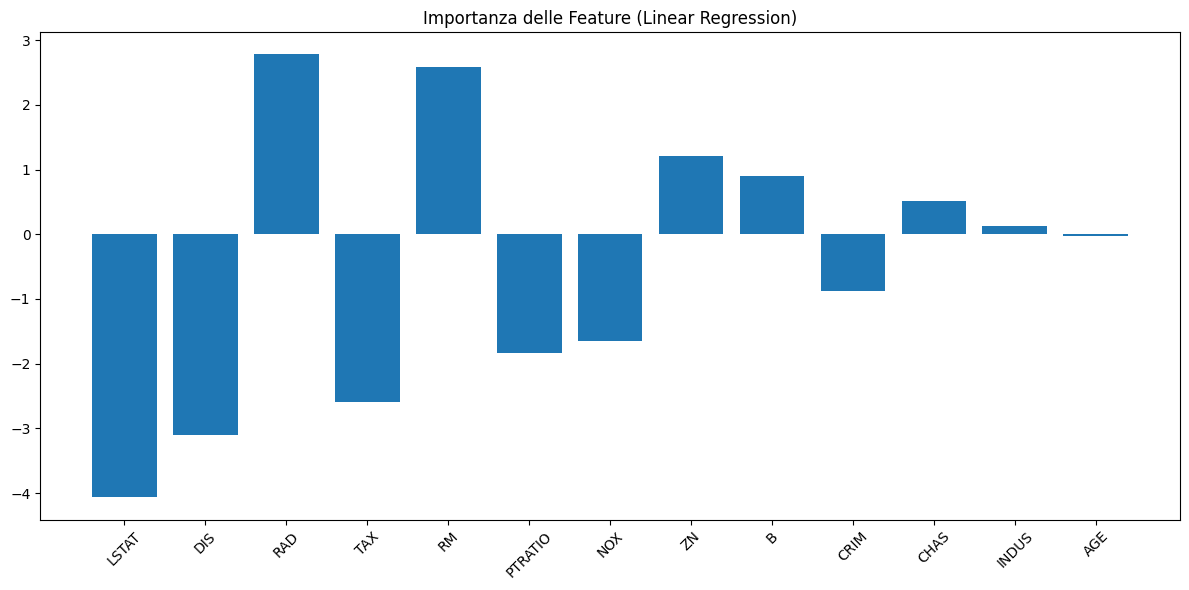

In [60]:
feature_importance = pd.DataFrame({
                                    'Feature': X.columns,  # Uso le colonne del DataFrame X invece di boston.feature_names
                                    'Coefficient': lr.coef_
                                    })
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(feature_importance['Feature'], feature_importance['Coefficient'])
plt.title('Importanza delle Feature (Linear Regression)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
X.iloc[0].values

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

## Inference

In [67]:
new_data_scaled = scaler.transform([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,4.980e+00]])
predictions = elastic.predict(new_data_scaled)
predictions[0]


30.507618158531674